# Group FARARA
## 11.1

In [1]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy.stats import cumfreq
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
image = ndimage.imread('testimg.jpg').flatten()
image = image / np.max(image)

In [3]:
image0 = image
image1 = image + np.random.normal(0, 0.05, image.shape)
image2 = image + np.random.normal(0, 0.1, image.shape)

In [ ]:
gs1 = gridspec.GridSpec(1, 3)
fig = plt.figure(figsize=(16, 6))

plt.subplot(gs1[0])
plt.hist(image0, bins=20, label="image 0")
plt.legend()


plt.subplot(gs1[1])
plt.hist(image1, bins=20, label="image 1")
plt.legend()



plt.subplot(gs1[2])
plt.hist(image2, bins=20, label="image 2")
plt.legend()
fig.tight_layout()

In [ ]:
plt.figure(figsize=(15, 8))
for key, i in enumerate([image0, image1, image2]):
    res = cumfreq(i, 100)
    x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size, res.cumcount.size)
    cc = res.cumcount / np.max(res.cumcount)
    plt.plot(x, cc, label="image {}".format(key))
plt.legend()
plt.show()

In [4]:
def density_estimate(train, test, h):
    p = train.shape[0]

    train_matrix = np.repeat([train],len(test),axis=0).T
    #print(train_matrix)
    estimates = ((np.abs((train_matrix - test).T/h)) < 0.5).sum(axis=1)

    return (1/h) * (1/p) * estimates

def neg_log_like(train, test, h):
    # Adding very small value, to avoid calculating log of 0
    estimates = -np.log(density_estimate(train, test, h)+0.00000001)
    return np.mean(estimates)

In [24]:
def mean_neg_log(data, h=0.005, N=10, P=5000, plot=False):
    nlls = 0
    for _ in range(N):
        train, test = train_test_split(image0, train_size=100)
        estimates = density_estimate(train, train, h)
        nll = neg_log_like(train, test[:P], h)
        nlls += nll

        if plot:
            plt.figure(figsize=(10,5))
            plt.bar(train, estimates)
            print(nll)
            plt.show()
    
    return nlls/N

2.97878477984


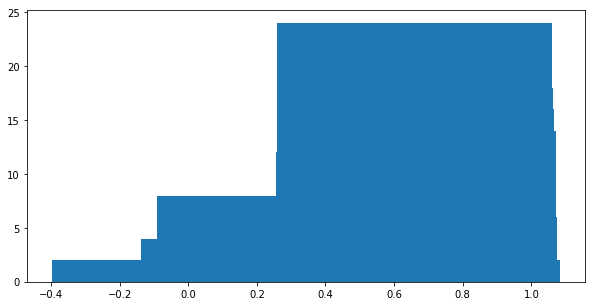

3.10376689561


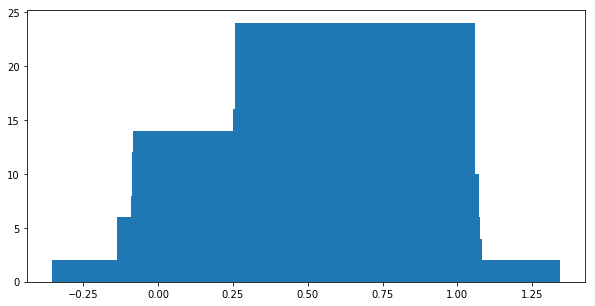

3.1856720421


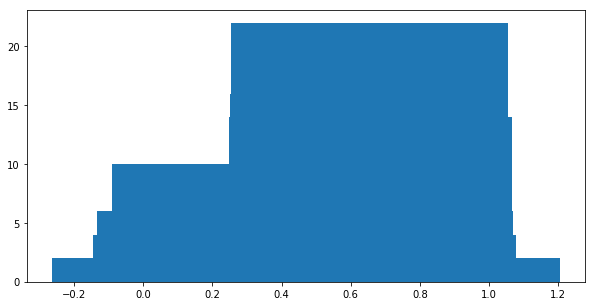

3.35407039479


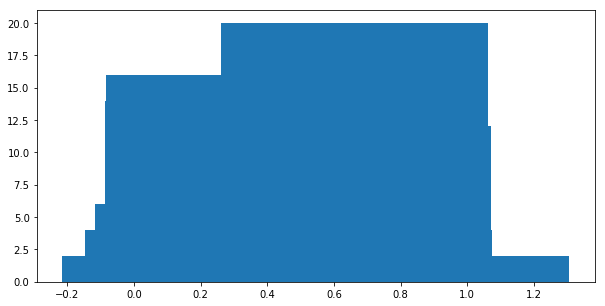

2.9789316155


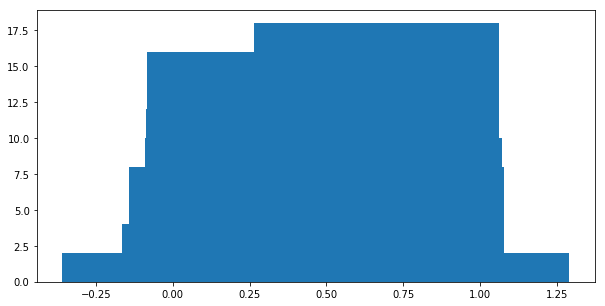

3.06244640592


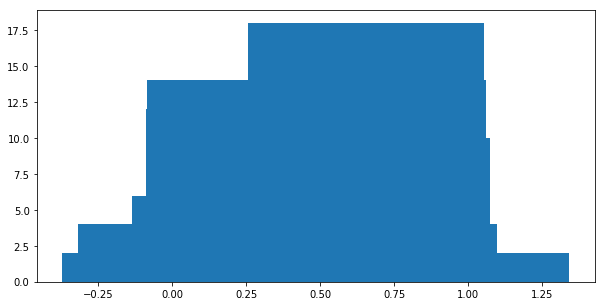

3.53406210097


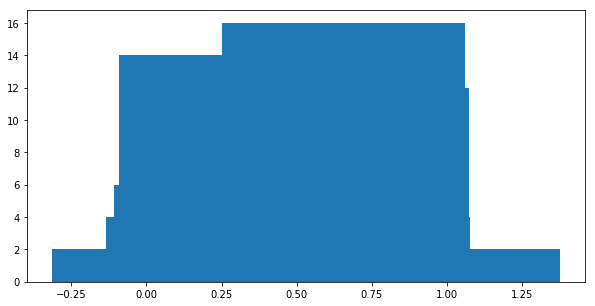

4.1291739196


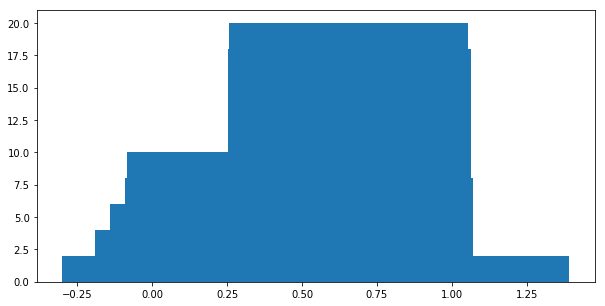

2.90222828828


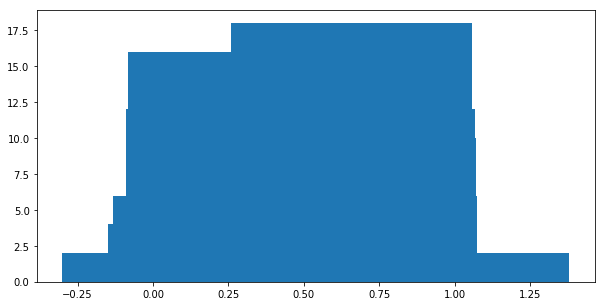

2.66737314794


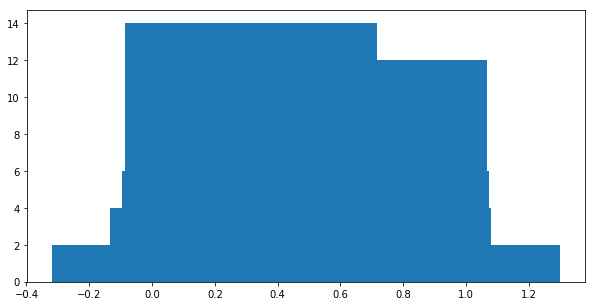

3.1896509590543003

In [9]:
mean_neg_log(image0, plot=True)

In [11]:
for h in [0.001, 0.005, 0.05, 0.5]:
    print(mean_neg_log(image0, h=h, plot=False))

1.76817645765
2.82058157461
-0.621074053631
-0.0494772318339


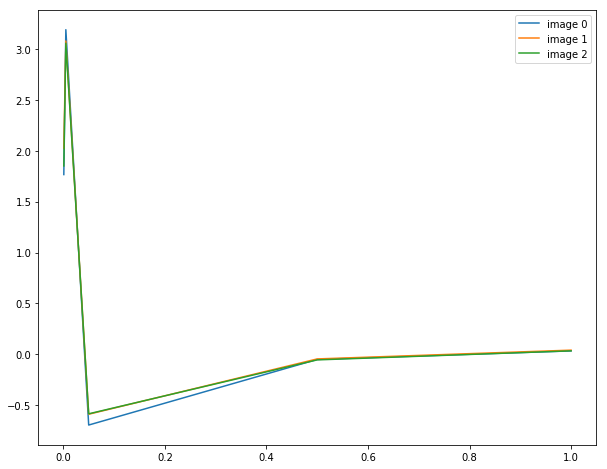

In [27]:
hs = [0.001, 0.005, 0.05, 0.5]
results = np.zeros((3, len(hs)))
for data_i, data in enumerate([image0, image1, image2]):
    for h_i, h in enumerate(hs):
        results[data_i, h_i] = mean_neg_log(image0, h=h, plot=False)

plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(hs, results[i], label="image {}".format(i))
plt.legend()
plt.show()

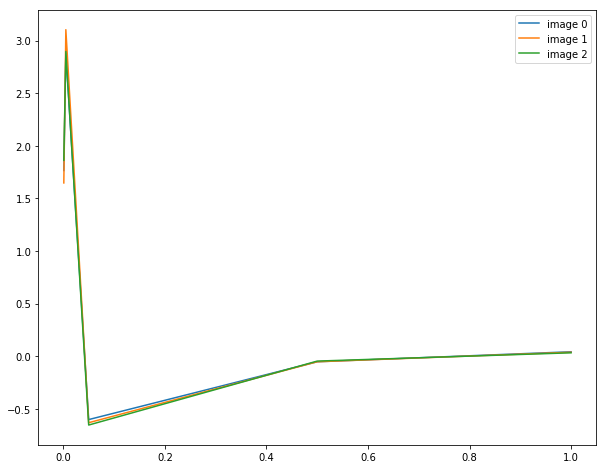

In [28]:
results = np.zeros((3, len(hs)))
for data_i, data in enumerate([image0, image1, image2]):
    for h_i, h in enumerate(hs):
        results[data_i, h_i] = mean_neg_log(image0, h=h, P=500, plot=False)

plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(hs, results[i], label="image {}".format(i))
plt.legend()
plt.show()

## 11.2

In [ ]:
class1 = np.random.multivariate_normal([2,2], [[0.7, 0],[0, 0.7]], 67)
class2 = np.random.multivariate_normal([1,1], [[0.2, 0],[0, 0.2]], 33)
data = np.vstack([class1, class2])

In [ ]:
m = np.hstack([np.zeros(67), np.ones(33)])

In [ ]:
#plt.scatter()
plt.scatter(class1[:,0], class1[:,1], color='red')
plt.scatter(class2[:,0], class2[:,1], color='blue')